In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/fixed_data.csv")

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0.0,0.0,342.0,2015.0,5.0,27.0,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,77.0
1,0.0,0.0,399.5,2015.0,5.0,27.0,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,77.0
2,0.0,0.0,7.0,2015.0,5.0,27.0,1.0,0.0,1.0,2.0,...,2.0,0.0,0.0,0.0,2.0,75.0,0.0,0.0,1.0,78.0
3,0.0,0.0,13.0,2015.0,5.0,27.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,2.0,75.0,0.0,0.0,1.0,78.0
4,0.0,0.0,14.0,2015.0,5.0,27.0,1.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,2.0,98.0,0.0,1.0,1.0,79.0


In [ ]:
# Ensure all columns are in numeric format
df['arrival_date_year'] = pd.to_numeric(df['arrival_date_year'], errors='coerce')
df['arrival_date_day_of_month'] = pd.to_numeric(df['arrival_date_day_of_month'], errors='coerce')

# Convert month names to numbers if needed
if df['arrival_date_month'].dtype == 'object':
    df['arrival_date_month'] = df['arrival_date_month'].str.capitalize()  # Ensure proper case
    df['arrival_date_month'] = df['arrival_date_month'].map({
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    })

# Drop any rows with NaN values in these columns
df = df.dropna(subset=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'])

# Create the date column manually
df['arrival_date'] = df.apply(lambda row: f"{int(row['arrival_date_year'])}-{int(row['arrival_date_month'])}-{int(row['arrival_date_day_of_month'])}", axis=1)
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# Drop unwanted columns
df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'], inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,0.0,0.0,342.0,0.0,0.0,2.0,0.0,0.0,0.0,67.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,77.0,2015-05-01
1,0.0,0.0,399.5,0.0,0.0,2.0,0.0,0.0,0.0,67.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,77.0,2015-05-01
2,0.0,0.0,7.0,0.0,1.0,2.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,2.0,75.0,0.0,0.0,1.0,78.0,2015-05-01
3,0.0,0.0,13.0,0.0,1.0,2.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,2.0,75.0,0.0,0.0,1.0,78.0,2015-05-01
4,0.0,0.0,14.0,0.0,2.0,2.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,2.0,98.0,0.0,1.0,1.0,79.0,2015-05-01


In [ ]:
df.drop(columns=['customer_type'], inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,0.0,0.0,342.0,0.0,0.0,2.0,0.0,0.0,0.0,67.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,77.0,2015-05-01
1,0.0,0.0,399.5,0.0,0.0,2.0,0.0,0.0,0.0,67.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,77.0,2015-05-01
2,0.0,0.0,7.0,0.0,1.0,2.0,0.0,0.0,0.0,32.0,...,2.0,0.0,0.0,0.0,75.0,0.0,0.0,1.0,78.0,2015-05-01
3,0.0,0.0,13.0,0.0,1.0,2.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,75.0,0.0,0.0,1.0,78.0,2015-05-01
4,0.0,0.0,14.0,0.0,2.0,2.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,98.0,0.0,1.0,1.0,79.0,2015-05-01


Number of records in training data: 10684
Number of records in testing data: 3562


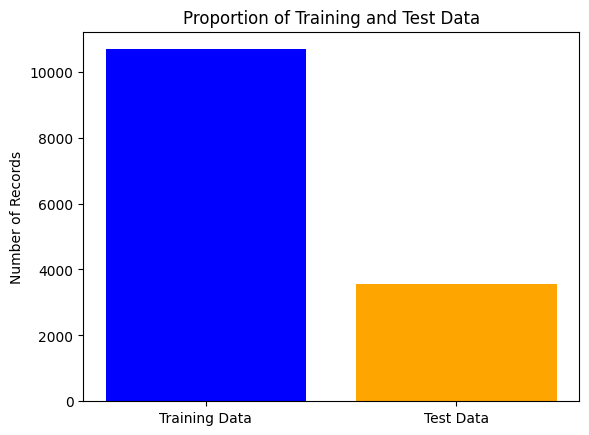

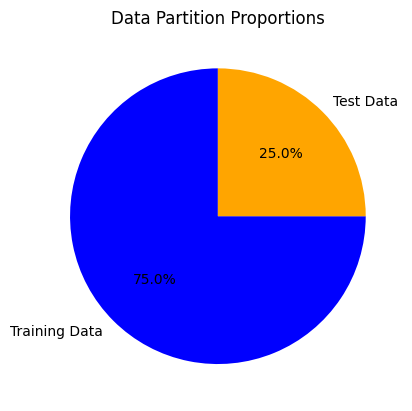

Z-statistic: 0.8986387577354511
P-value: 0.3688451073728345
Fail to reject the null hypothesis (H₀). This suggests no significant difference in the means (null hypothesis is true


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ztest



# Select relevant columns
df_partition = df[['adults', 'children', 'babies', 'arrival_date', 'stays_in_weekend_nights',
                   'stays_in_week_nights', 'country', 'assigned_room_type',
                   'required_car_parking_spaces', 'total_of_special_requests',
                   'booking_changes', 'meal', 'market_segment', 'is_repeated_guest',
                   'previous_cancellations', 'adr']]

# Partition the data (75% training, 25% testing)
train_data, test_data = train_test_split(df_partition, test_size=0.25, random_state=42)

# Check the number of records in each set
num_train = len(train_data)
num_test = len(test_data)

print(f"Number of records in training data: {num_train}")
print(f"Number of records in testing data: {num_test}")

# Plotting a bar graph to visualize the proportions
labels = ['Training Data', 'Test Data']
sizes = [num_train, num_test]
plt.bar(labels, sizes, color=['blue', 'orange'])
plt.title('Proportion of Training and Test Data')
plt.ylabel('Number of Records')
plt.show()

# Additional relevant graph - Pie chart of data proportions
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Data Partition Proportions')
plt.show()

# Validate partition by performing a two-sample Z-test on a column
# Let's perform the Z-test on the 'adr' (Average Daily Rate) column
train_adr = train_data['adr']
test_adr = test_data['adr']

# Perform the Z-test to compare means between training and testing data
z_stat, p_value = ztest(train_adr, test_adr)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
  print("Reject the null hypothesis (H₀). This suggests the means are significantly different (alternative hypothesis is true)")
if p_value >= 0.05:
  print("Fail to reject the null hypothesis (H₀). This suggests no significant difference in the means (null hypothesis is true)")
